In [1]:
%matplotlib inline

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib
import seaborn as sns
matplotlib.style.use('seaborn')

/tmp/ipykernel_71911/3317725158.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [4]:
df = pd.read_json('data/nobel_winners_cleaned.json')
df.head()

,link,name,year,category,country,text,date_of_birth,date_of_death,place_of_birth,place_of_death,gender,award_age,born_in,mini_bio,bio_image
0,http://en.wikipedia.org/wiki/William_Lawrence_...,William Lawrence Bragg,1915,Physics,Australia,"William Lawrence Bragg , Physics, 1915",1890-03-31T00:00:00.000,1971-07-01T00:00:00.000,Adelaide,Ipswich,male,25,None,"<p><b>Sir William Lawrence Bragg</b>, <span cl...",full/b4d88a037d9c0f170526571118b81450d99a8c4b.jpg
1,http://en.wikipedia.org/wiki/Brian_Schmidt,Brian Schmidt,2011,Physics,Australia,"Brian Schmidt , born in the United States , P...",1967-02-24T00:00:00.000,None,Missoula,None,male,44,None,"<p><b>Brian Paul Schmidt</b> <span class=""noex...",full/a5f763b828006e704cb291411b8b643bfb91886c.jpg
2,http://en.wikipedia.org/wiki/Barry_Marshall,Barry Marshall,2005,Physiology or Medicine,Australia,"Barry Marshall , Physiology or Medicine, 2005",1951-09-30T00:00:00.000,None,Kalgoorlie,None,male,54,None,"<p><b>Barry James Marshall</b> <span class=""no...",full/976cea55c7b67dbceee0d4935c97fec5f7da2822.jpg
3,http://en.wikipedia.org/wiki/Robin_Warren,J. Robin Warren,2005,Physiology or Medicine,Australia,"J. Robin Warren , Physiology or Medicine, 2005",1937-06-11T00:00:00.000,None,Adelaide,None,male,68,None,"<p><b>John Robin Warren</b> <span class=""noexc...",full/3262c0c444deb3995e1388da14c9b4f22c82f0a2.jpg
4,http://en.wikipedia.org/wiki/Peter_C._Doherty,Peter C. Doherty,1996,Physiology or Medicine,Australia,"Peter C. Doherty , Physiology or Medicine, 1996",1940-10-15T00:00:00.000,None,Brisbane,None,male,56,None,"<p><b>Peter Charles Doherty</b> <span class=""n...",full/cae91e7160f5fa613df8bb852b1655ca2e224039.jpg


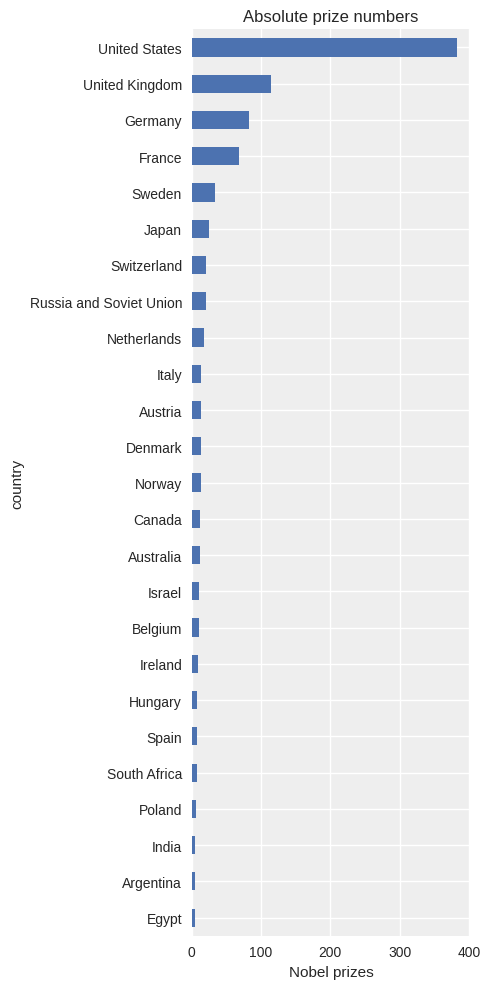

In [78]:
# df_countries = pd.read_json('data/winning_country_data.json')
# df_countries
ax = df.groupby("country").size().sort_values(ascending=True).tail(25).plot(kind='barh',figsize=[5,10],title='Absolute prize numbers')
ax.set_xlabel('Nobel prizes')
ax.set_facecolor('#eee')
plt.tight_layout()
plt.savefig('images/country_absolute_prize_numbers.png')


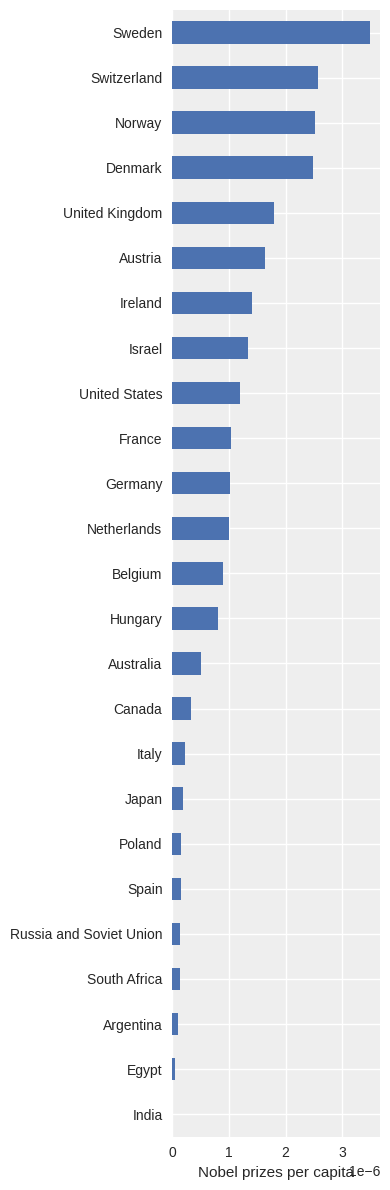

In [80]:
nat_group = df.groupby("country").size()
df_countries = pd.read_json("data/winning_country_data.json", orient="index")
df_countries["nobel_wins"] = nat_group
df_countries["nobel_wins_per_capita"] = (
    df_countries.nobel_wins / df_countries.population
)
# df_countries
ax = (
    df_countries[df_countries.nobel_wins > 2]
    .sort_values(by="nobel_wins_per_capita", ascending=True)
    .nobel_wins_per_capita.plot(
        kind="barh",
        figsize=[4, 12],
    )
)
ax.set_xlabel("Nobel prizes per capita")
ax.set_facecolor("#eee")
plt.tight_layout()
plt.savefig("images/country_relative_prize_numbers.png")